In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to a range of 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 1D array
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for each digit

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Training the model*
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


In [ ]:
# Evaluate the model on the test data*
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 1s 2ms/step - loss: 0.1478 - accuracy: 0.9796
Test accuracy: 0.9796


In [ ]:
# Choose some random test images*
num_samples = 10

sample_indices = np.random.randint(0, x_test.shape[0], num_samples)

# Make predictions
predictions = model.predict(x_test[sample_indices])

# Display the results
for i, idx in enumerate(sample_indices):
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True label: {np.argmax(y_test[idx])}, Predicted label: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
# Assuming you have trained and compiled your model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Save the model to Colab's temporary directory
model.save('10_EPOCH_trained_model.h5')


Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2772 - accuracy: 0.9205 - val_loss: 0.1369 - val_accuracy: 0.9618
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1250 - accuracy: 0.9628 - val_loss: 0.0918 - val_accuracy: 0.9738
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0855 - accuracy: 0.9737 - val_loss: 0.0853 - val_accuracy: 0.9730
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0626 - accuracy: 0.9812 - val_loss: 0.0751 - val_accuracy: 0.9760
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0868 - val_accuracy: 0.9758
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0752 - val_accuracy: 0.9785
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0789 - val_accuracy

In [11]:
import shutil

temp_path = '/content/10_EPOCH_trained_model.h5'
drive_path = '/content/drive/MyDrive/10_EPOCH_trained_model.h5'

shutil.copy2(temp_path, drive_path)



'/content/drive/MyDrive/10_EPOCH_trained_model.h5'

In [12]:
# Assuming your model is saved in '/content/drive/MyDrive/Newton-Digit-Recognition/trained_model.h5'
model_path = '/content/10_EPOCH_trained_model.h5'
model = tf.keras.models.load_model(model_path)


In [ ]:
# *

!pip install -U -q PyDrive

In [ ]:
# *
from google.colab import auth
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth

# Authenticate with Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleDrive(gauth)
drive = GoogleDrive(gauth)



In [ ]:
# *
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Folder path where the images are located
folder_path = '/content/drive/MyDrive/Newton-Digit-Recognition'

# List all files in the folder
file_list = os.listdir(folder_path)

# Filter the files to select only image files (you can add more image extensions if needed)
image_extensions = ['.jpg', '.jpeg', '.png']
image_files = [file for file in file_list if os.path.splitext(file)[1].lower() in image_extensions]

# Load and preprocess the images
images = []
for image_file in image_files:
    # Load the image without reducing the image quality
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path).convert('L')

    # Resize the image to match the input shape of your model (28x28)
    image = image.resize((28, 28))

    image_array = np.array(image) / 255.0
    image_array = image_array.reshape(1, 28, 28)
    images.append(image_array)

# Visualize the images (optional)
for image_array in images:
    plt.imshow(image_array[0], cmap='gray')
    plt.axis('off')
    plt.show()


In [ ]:
# Assuming you've already loaded your trained model *
# model = tf.keras.models.load_model(model_path)

# Make predictions and visualize the results
for i, image_array in enumerate(images):
    prediction = model.predict(image_array)
    predicted_label = np.argmax(prediction[0])

    plt.imshow(image_array[0], cmap='gray')
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')
    plt.show()


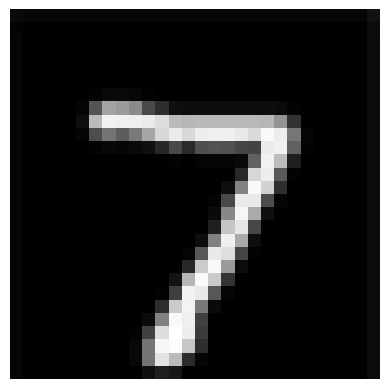

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path to the single image you want to test
single_image_path = '/content/drive/MyDrive/sample_image.png'  # Replace with the actual path

# Load the image
image = Image.open(single_image_path).convert('L')

# Resize the image to match the input shape of your model (28x28)
image = image.resize((28, 28))

# Preprocess the image
image_array = np.array(image) / 255.0
image_array = image_array.reshape(1, 28, 28)

# Visualize the image (optional)
plt.imshow(image_array[0], cmap='gray')
plt.axis('off')
plt.show()


In [18]:
# Assuming you've already loaded your trained model
# model = tf.keras.models.load_model(model_path)

# Make prediction
prediction = model.predict(image_array)
predicted_label = np.argmax(prediction[0])

print(f"Predicted label: {predicted_label}")


1/1 [==============================] - 0s 20ms/step
Predicted label: 7
